# Hierarchical Clustering

In data mining and statistics, hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. (Wikipedia)

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View columns 
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
print("Shape of dataset before cleaning: ", dataset.size)

Shape of dataset before cleaning:  7032


In [4]:
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
print("Shape of dataset after cleaning: ", dataset.size)
dataset.head(5)

Shape of dataset after cleaning:  7032


,Open,High,Low,Close,Adj Close,Volume
0,3.85,3.98,3.84,3.95,3.95,20548400
1,3.98,4.00,3.88,4.00,4.00,22887200
2,4.01,4.18,3.99,4.13,4.13,42398300
3,4.19,4.25,4.11,4.18,4.18,42932100
4,4.23,4.26,4.14,4.18,4.18,30678700


In [5]:
features = dataset[['Open','High','Low','Close','Adj Close','Volume']]

In [6]:
# Normalization
# Transforms each features by scaling between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
x = features.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.09562607, 0.0894182 , 0.09687229, 0.09856176, 0.09856176,
        0.06321449],
       [0.10120068, 0.09019914, 0.09860991, 0.10067682, 0.10067682,
        0.0704095 ],
       [0.10248713, 0.09722765, 0.10338836, 0.10617597, 0.10617597,
        0.13043287],
       [0.11020583, 0.09996096, 0.10860122, 0.10829103, 0.10829103,
        0.13207504],
       [0.11192109, 0.10035143, 0.10990444, 0.10829103, 0.10829103,
        0.09437904]])

In [7]:
# Clustering
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [9]:
import pylab
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

In [10]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([20, 20, 21, ...,  1,  2,  6], dtype=int32)

In [11]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 1, 1, 2], dtype=int32)

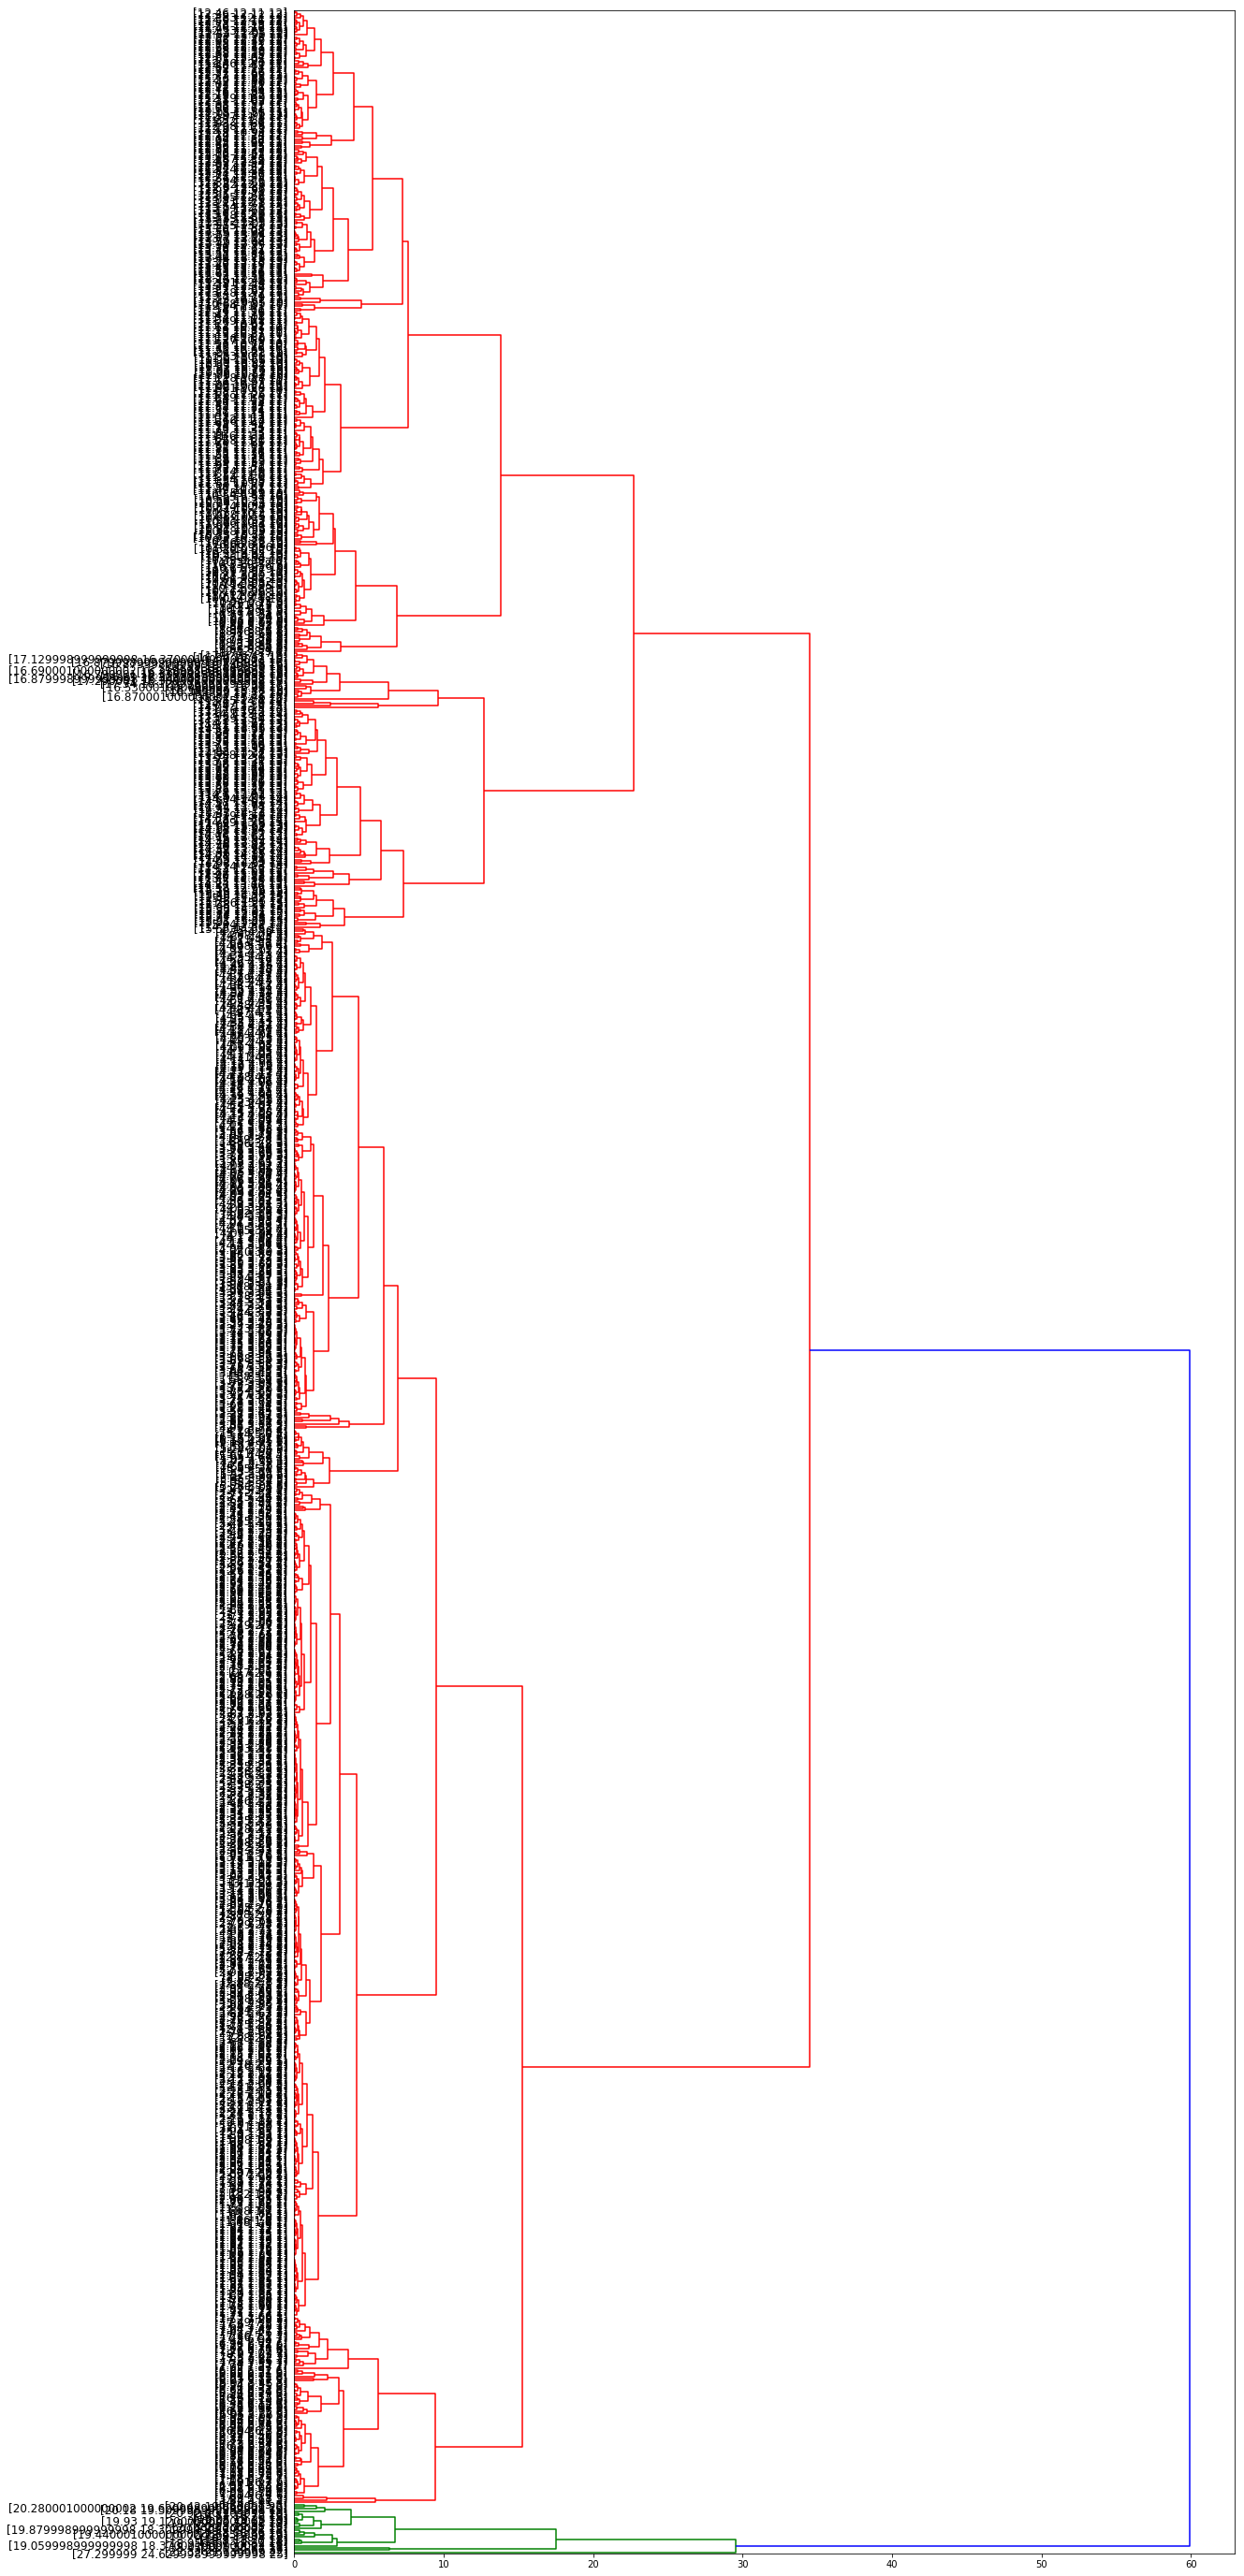

In [14]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (dataset['High'][id], dataset['Low'][id], int(float(dataset['Adj Close'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [15]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.00976835 0.06917214 ... 1.70760863 1.89200145 2.22832672]
 [0.00976835 0.         0.06113243 ... 1.70097805 1.88495501 2.22031186]
 [0.06917214 0.06113243 0.         ... 1.68151169 1.86147767 2.18596191]
 ...
 [1.70760863 1.70097805 1.68151169 ... 0.         0.22110255 0.73622715]
 [1.89200145 1.88495501 1.86147767 ... 0.22110255 0.         0.53083952]
 [2.22832672 2.22031186 2.18596191 ... 0.73622715 0.53083952 0.        ]]


In [17]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, ..., 1, 1, 3], dtype=int64)

In [18]:
dataset['cluster_'] = agglom.labels_
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,cluster_
0,3.85,3.98,3.84,3.95,3.95,20548400,0
1,3.98,4.00,3.88,4.00,4.00,22887200,0
2,4.01,4.18,3.99,4.13,4.13,42398300,0
3,4.19,4.25,4.11,4.18,4.18,42932100,0
4,4.23,4.26,4.14,4.18,4.18,30678700,0


Text(0,0.5,'Low')

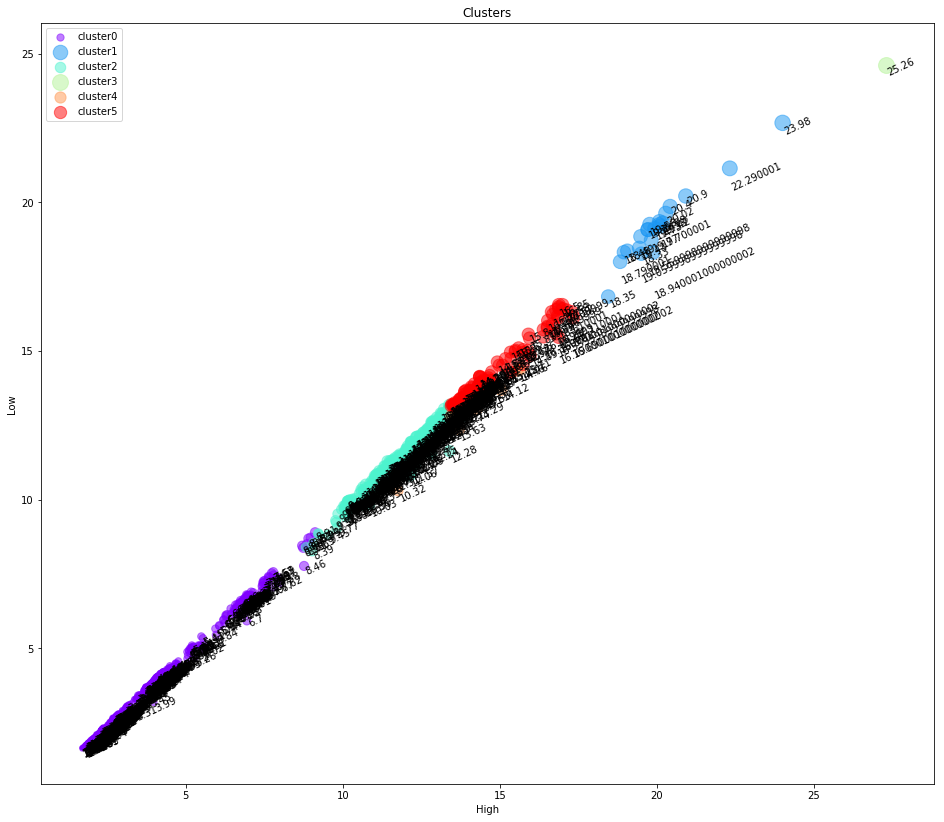

In [22]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = dataset[dataset.cluster_ == label]
    for i in subset.index:
            plt.text(subset.High[i], subset.Low[i],str(subset['Adj Close'][i]), rotation=25) 
    plt.scatter(subset.High, subset.Low, s=subset.Close*10, c=color, label='cluster'+str(label),alpha=0.5)
#   plt.scatter(subset.High, subset.Low)
plt.legend()
plt.title('Clusters')
plt.xlabel('High')
plt.ylabel('Low')

In [23]:
dataset.groupby(['cluster_','Volume'])['cluster_'].count()

cluster_  Volume   
0         0            1
          2606600      1
          3532100      1
          3576800      1
          4029600      1
          4149700      1
          4290400      1
          4302200      1
          4349000      1
          4474400      1
          4557600      1
          4572600      1
          4624000      1
          4671500      1
          4704300      1
          4863200      1
          4897100      1
          4928300      1
          5377800      1
          5531700      1
          5542900      1
          5579800      1
          5591100      1
          5644600      1
          5646400      1
          5665000      1
          5693100      1
          5708000      1
          5738100      1
          5755600      1
                      ..
5         75942900     1
          76280600     1
          77612200     1
          78320200     1
          78366500     1
          78508400     1
          80317600     1
          80737600     1
     

In [25]:
agg_price = dataset.groupby(['cluster_','Volume'])['Open','High','Low','Adj Close'].mean()
agg_price

Open       High        Low  Adj Close
cluster_ Volume                                               
0        0           2.670000   2.670000   2.670000   2.670000
         2606600     2.370000   2.380000   2.320000   2.330000
         3532100     2.020000   2.090000   2.020000   2.070000
         3576800     2.050000   2.070000   2.000000   2.000000
         4029600     2.650000   2.690000   2.650000   2.650000
         4149700     1.990000   2.020000   1.950000   1.990000
         4290400     1.840000   1.880000   1.830000   1.840000
         4302200     2.210000   2.240000   2.170000   2.200000
         4349000     2.680000   2.740000   2.680000   2.710000
         4474400     2.150000   2.180000   2.110000   2.130000
         4557600     2.310000   2.330000   2.300000   2.310000
         4572600     2.230000   2.290000   2.210000   2.280000
         4624000     2.630000   2.700000   2.630000   2.650000
         4671500     2.350000   2.360000   2.330000   2.350000
         4704300     2.100000   2.160000   2.090000   2.140000
         4863200     2.220000   2.240000   2.180000   2.220000
         4897100     2.140000   2.150000   2.120000   2.120000
         4928300     1.870000   1.900000   1.850000   1.890000
         5377800     1.870000   1.900000   1.810000   1.810000
         5531700     1.770000   1.770000   1.720000   1.740000
         5542900     2.000000   2.030000   1.970000   2.020000
         5579800     2.020000   2.040000   1.980000   2.030000
         5591100     2.830000   2.870000   2.800000   2.830000
         5644600     1.750000   1.750000   1.680000   1.710000
         5646400     2.360000   2.370000   2.310000   2.340000
         5665000     2.850000   2.850000   2.770000   2.790000
         5693100     1.690000   1.700000   1.660000   1.660000
         5708000     1.700000   1.720000   1.680000   1.720000
         5738100     2.700000   2.740000   2.690000   2.700000
         5755600     2.120000   2.160000   2.100000   2.150000
...                       ...        ...        ...        ...
5        75942900   13.210000  13.750000  13.080000  13.560000
         76280600   16.830000  17.129999  16.370001  16.520000
         77612200   16.059999  16.520000  15.820000  16.340000
         78320200   13.610000  13.880000  13.270000  13.810000
         78366500   13.290000  13.530000  13.150000  13.480000
         78508400   14.170000  14.390000  13.960000  14.290000
         80317600   14.200000  14.450000  13.820000  14.320000
         80737600   15.210000  15.890000  15.010000  15.730000
         81930500   14.520000  15.330000  14.310000  15.250000
         82084600   13.460000  13.930000  13.320000  13.920000
         82604900   16.299999  16.389999  15.720000  16.049999
         84566200   14.100000  14.750000  14.010000  14.550000
         84891600   14.200000  14.360000  14.150000  14.250000
         85266900   13.650000  13.700000  13.090000  13.230000
         88392100   13.270000  13.750000  13.180000  13.360000
         89319700   13.760000  14.040000  13.370000  13.400000
         90227300   15.810000  16.520000  15.780000  16.320000
         91565600   13.680000  14.500000  13.540000  14.400000
         92542900   16.850000  17.290001  16.309999  16.690001
         94418400   15.640000  15.740000  14.540000  15.110000
         95422900   14.270000  15.350000  14.270000  15.200000
         95638400   16.650000  16.870001  15.460000  15.650000
         97089000   15.070000  15.740000  15.040000  15.670000
         98047400   14.290000  14.320000  13.870000  14.110000
         99860300   15.830000  15.970000  14.850000  14.890000
         101012500  14.390000  14.490000  13.840000  14.080000
         104317400  16.180000  17.340000  16.129999  17.110001
         104330900  14.590000  14.780000  13.870000  13.900000
         111656900  14.330000  14.490000  13.430000  13.530000
         113048600  16.620001  16.790001  15.580000  16.250000

[1171 rows x 4 columns]

Text(0,0.5,'Low')

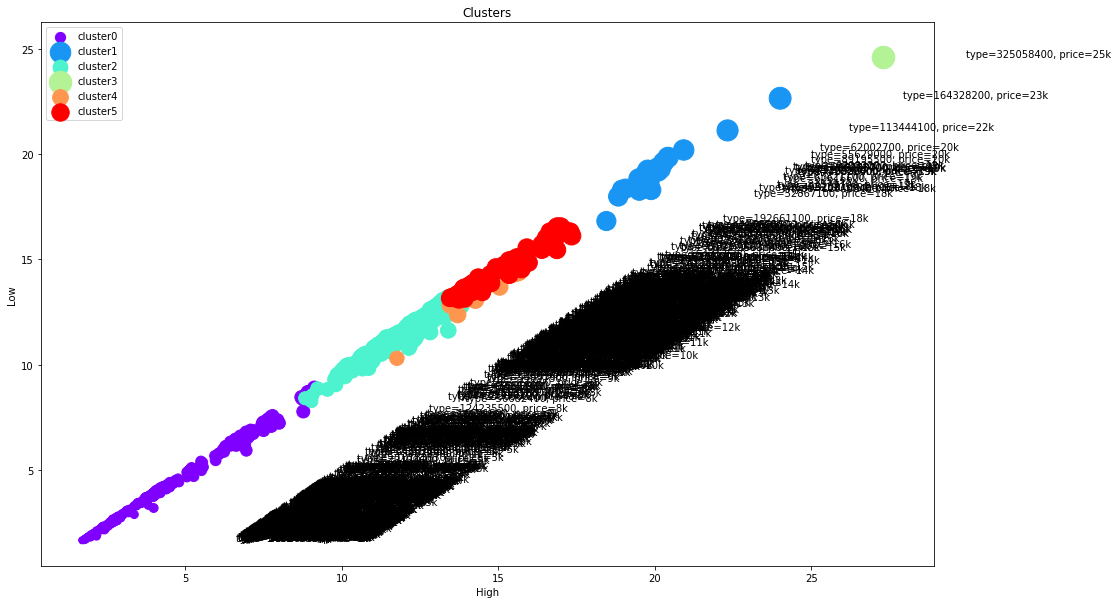

In [27]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_price.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.High, subset.Low, s=subset['Adj Close']*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('High')
plt.ylabel('Low')
